# Project: Investigate a Dataset - [No-show appointments ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

### This dataset 
>collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<p>file name :noshowappointments-kagglev2-may-2016.csv
<table>
  <tr>      
    <th>Column Name</th>
    <th>significance</th>    
  </tr>
  <tr> 
     <td> PatientId </td> <td> the patient id number </td>
   </tr> 
   <tr> 
     <td> AppointmentID </td> <td> the Appointment ID on the system</td>
   </tr> 
   <tr> 
     <td> Gender</td> <td> the patient  Gender</td>
   </tr> 
   <tr> 
     <td>ScheduledDay</td> <td>  tells us on what day the patient set up their appointment. </td>
   </tr> 
   <tr> 
     <td>AppointmentDay</td> <td> tells us on what is the  day of the appointment </td>
   </tr> 
   <tr> 
     <td>Age</td> <td> the patient age </td>
   </tr> 
   <tr> 
     <td>Neighbourhood</td> <td> indicates the location of the hospital.</td>
   </tr> 
   <tr> 
     <td>Scholarship</td> 
       <td> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</td>
   </tr> 
   <tr> 
     <td>Hipertension</td> <td>  </td>
   </tr> 
   <tr> 
     <td>Diabetes</td> <td> </td>
   </tr> 
   <tr> 
     <td>Alcoholism</td> <td> </td>
   </tr> 
   <tr> 
     <td>Handcap</td> <td> </td>
   </tr> 
   <tr> 
     <td>SMS_received</td> <td> </td>
   </tr> 
   <tr> 
     <td>No-show</td> <td> it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</td>
   </tr>   
 </table> 


### Question(s) for Analysis
 > What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
def plot_noshow_rate(col,title,xname,yname):
    (df[noshow].groupby(col).patientid.count()/df.groupby(col).patientid.count()).plot(kind= 'bar',figsize=(20,3))
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()

In [4]:
def plot_noshow_all(col,title,xname,yname,l1,l2):
    df[noshow][col].hist(alpha=0.5, bins=30, label=l1,figsize=(12,5))
    df[col].hist(alpha=0.5, bins=30, label=l2)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend() 

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# operations to inspect data

In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
for i in df.columns:
    if len(df[i].unique())<3:
        print(i,':',df[i].unique())

Gender : ['F' 'M']
Scholarship : [0 1]
Hipertension : [1 0]
Diabetes : [0 1]
Alcoholism : [0 1]
SMS_received : [0 1]
No-show : ['No' 'Yes']



### Data Cleaning



<ol>
  <li> Convert the PatientId column to str </li> 
  <li> Drop AppointmentID column </li>
  <li> Rename all columns to lowercase & replace spaces and hyphens into underscore  </li>
  <li> Convert the ScheduledDay ,AppointmentDay columns to DateTime </li>      
  <li> Create column interval as the interval between  ScheduledDay and AppointmentDay</li>    
  <li> Create column interval_class for group each 10 days in a class</li>
</ol>



In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [10]:
# 1. convert the PatientId column to string
df.PatientId =  df.PatientId.astype(int).astype(str)

In [11]:
# 2. Drop AppointmentID column
df.drop([ 'AppointmentID'], axis=1, inplace=True)

In [12]:
# 3. Rename all column labels to replace spaces and Hyphens with underscores and convert everything to lowercase.
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

In [13]:
# 4. convert the scheduledday column to datetime
df.scheduledday = pd.to_datetime(df.scheduledday)
# convert the appointmentday column to datetime
df.appointmentday = pd.to_datetime(df.appointmentday)

In [14]:
df.loc[df['no_show'] =='Yes', 'no_show'] = 1
df.loc[df['no_show'] =='No', 'no_show'] = 0

In [15]:
 df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [16]:
# 5. Create column interval as the interval between ScheduledDay and AppointmentDay
df['interval']=((df.appointmentday-df.scheduledday) / np.timedelta64(1, 'D')).astype(int)

In [17]:
df['age_interval']=df['age']//5

In [18]:
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,interval,age_interval
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,12


In [19]:
df.shape

(110527, 15)

In [20]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,interval,age_interval
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,9.532648,7.030110
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.027798,4.605492
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,11.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178.000000,23.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
interval          110527 non-null int64
age_interval      110527 non-null int64
dtypes: datetime64[ns, UTC](2), int64(10), object(3)
memory usage: 12.6+ MB


In [22]:
sum(df.duplicated())

618

In [23]:
df.drop_duplicates(inplace=True)

interval should not be -ve 

In [24]:
df.loc[df['interval'] <0, 'interval'] = 1

In [25]:
# 6. Create column interval_class for group each 10 days in a class
df['interval_class'] = (df['interval']/10).astype(int)

In [26]:
#check the change
df.query('interval<0')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,interval,age_interval,interval_class


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

for easy grouped data we create masks noshow for patient who no-show and another mask for who show and see its histograms

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
noshow = df.no_show == 1
show   = df.no_show == 0
df.groupby('no_show').patientid.count()

no_show
0    87804
1    22105
Name: patientid, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24de8cb278>,
      dtype=object)

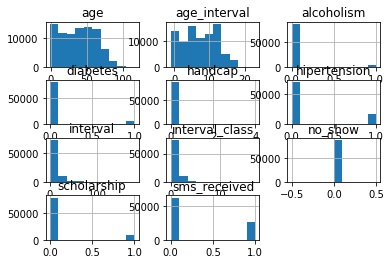

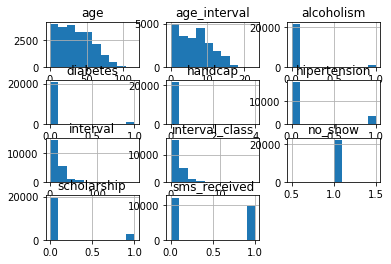

In [28]:
df[show].hist()
df[noshow].hist()

## we will  study the Correlation between no_show column and the others

In [29]:
df.corr().no_show

age              -0.060873
scholarship       0.029317
hipertension     -0.035932
diabetes         -0.014546
alcoholism       -0.000601
handcap          -0.006226
sms_received      0.128544
no_show           1.000000
interval          0.179732
age_interval     -0.061411
interval_class    0.151527
Name: no_show, dtype: float64

there is a weak positive linear relationship with interval(and interval_class) and sms_received columns

## first we will study interval_class

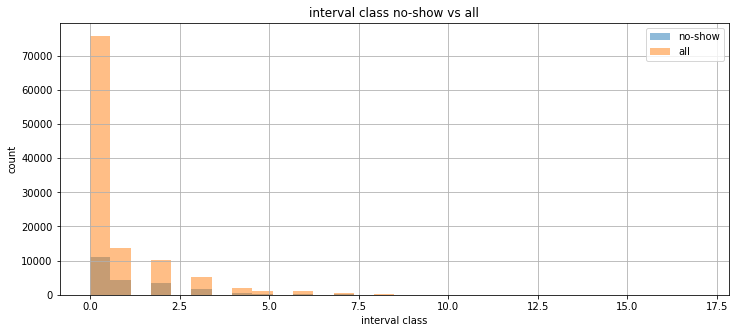

In [30]:
plot_noshow_all('interval_class','interval class no-show vs all','interval class','count','no-show','all')

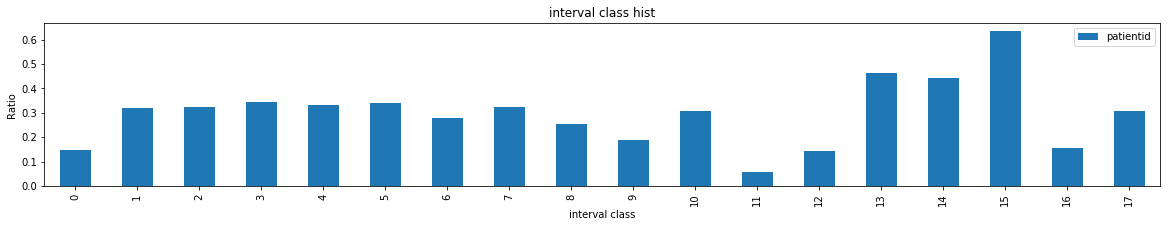

In [31]:
plot_noshow_rate('interval_class','interval class hist','interval class','Ratio')

it is clear when the interval is smaller than 10 days the no_show is about 15% of all Appointments, and then it is rise to more than 30% and then it is decrese in the middel range till 120 days where it pop up agine
the delay interval has a positive impact on the no-show rate

## now we will study sms_received column

In [32]:
df.groupby('sms_received').patientid.count()

sms_received
0    74427
1    35482
Name: patientid, dtype: int64

In [33]:
df.groupby('no_show').patientid.count()

no_show
0    87804
1    22105
Name: patientid, dtype: int64

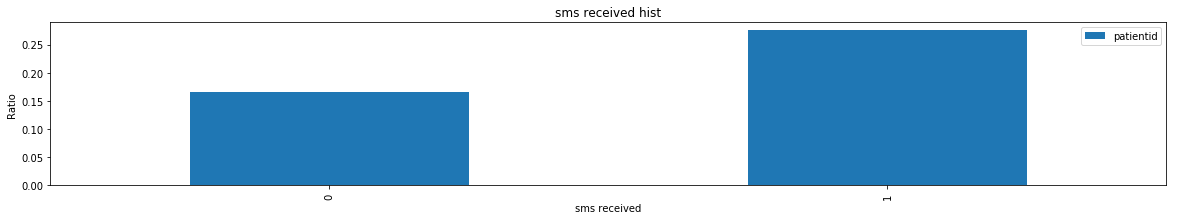

In [34]:
plot_noshow_rate('sms_received','sms received hist','sms received','Ratio')

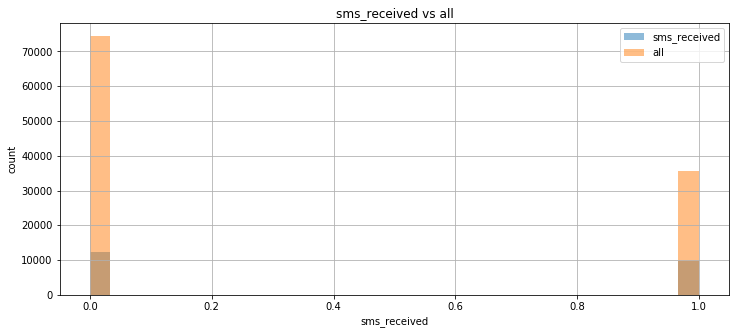

In [35]:
plot_noshow_all('sms_received','sms_received vs all','sms_received','count','sms_received','all')


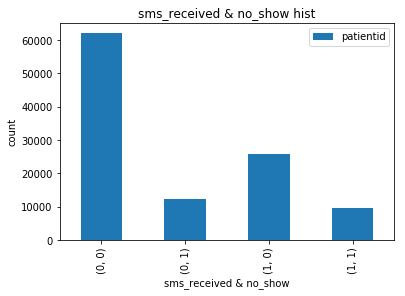

In [36]:
df.groupby(['sms_received','no_show']).patientid.count().plot(kind= 'bar');
plt.title('sms_received & no_show hist')
plt.xlabel('sms_received & no_show')
plt.ylabel('count')
plt.legend()

Receiving an SMS reminder has a positive effict on no-show rate
or in other word sms targeting patients who no-show more than the others :-)

## now we will study age column

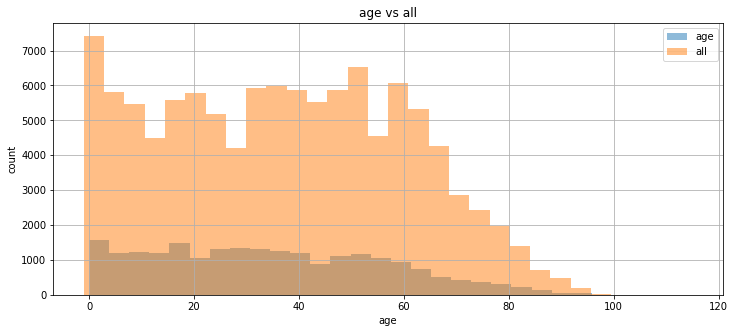

In [37]:
plot_noshow_all('age','age vs all','age','count','age','all')



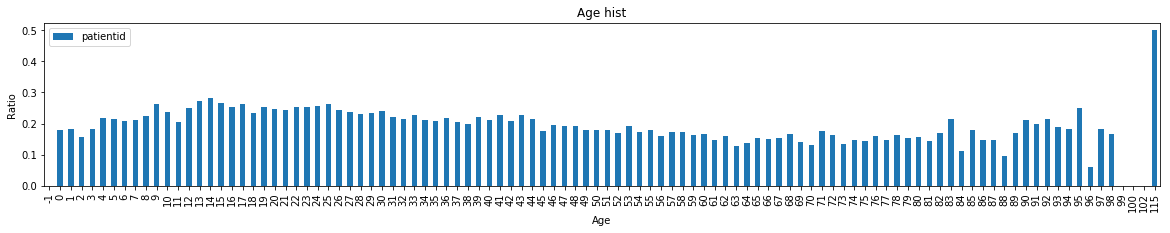

In [38]:
plot_noshow_rate('age','Age hist','Age','Ratio')

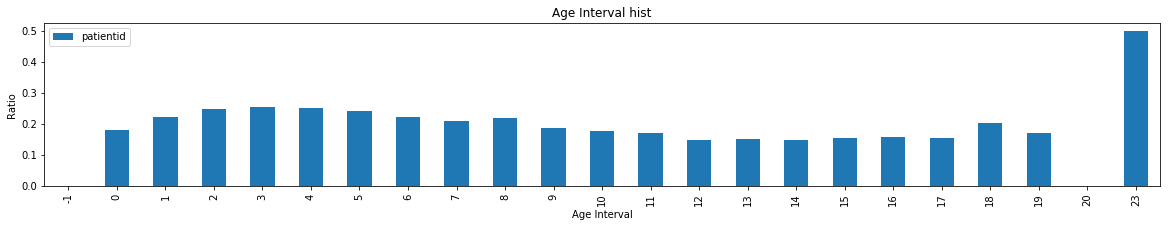

In [39]:
plot_noshow_rate('age_interval','Age Interval hist','Age Interval','Ratio')

<p> The no-show rate increse in the teenage and then decrease regaualy tell 80s it increse agine in 90s but it is a small effect 
<p> The same result will appear if we study age_interval as each interval = 5 years

## now we will study gender column

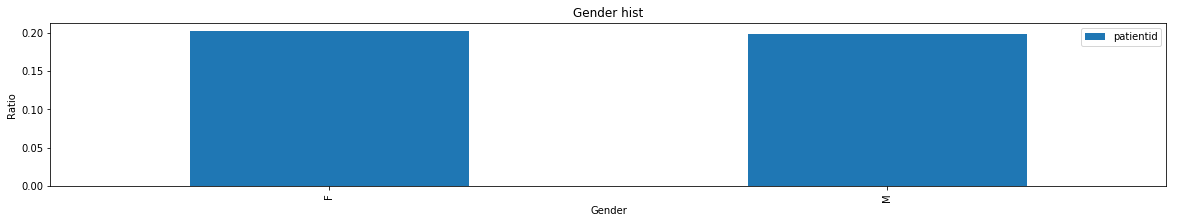

In [40]:
plot_noshow_rate('gender','Gender hist','Gender','Ratio')

gender has no effect on no-show rate

<a id='conclusions'></a>
## Conclusions
<b>Results:</b> our data suggest that
<ol>
   <li> The delay interval has a positive impact on the no-show rate </li>
   <li> Receiving an SMS reminder has a positive effict on no-show rate
        or in other word sms targeting patients who no-show more than the others :-) </li>
   <li> The age hase a very small effect on no-show rate , The no-show rate increse in the teenage and then decrease regaualy tell 80s it increse agine in 90s but it is a small effect </li>
    <li> gender has no effect on no-show rate </li>
  </ol>  
  
<b>Limitations:</b> 
<ol>
  <li>  categorical data prevent strong Correlation between variables </li>
  <li> Neighbourhood is just a string and there is no classification for this locations prevent analysis</li>  
</ol>  




In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0